> Code to accompany **Chapter 4: DNN Processing for Image, Audio and Video**

# Pre-processing Images for ResNet50

The image data used to train models such as ResNet50 usually undergoes preprocessing. Images that are subsequently submitted to the model should have the same preprocessing.

This notebook illustrates the pre-processing steps for the ResNet50 model.

* __Normalise data__: By subtracting the mean RGB values for the complete training data, centres the data around zero mean for each of the channels. Normalising in this way enables the network to learn faster.

* __Switch Channel Order__: ResNet50 was trained on images with the channels ordered BGR, rather than RGB. If the image is in RGB format, the channel order needs to be switched.


## Some helper functions

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Access helper function 
import sys
sys.path.append('..')
from strengtheningdnns.image_utils import image_from_file

(?, ?, ?)
Re-scaling image to  (224, 224)


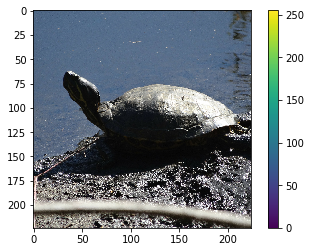

In [2]:
image_path = '../images/turtle.jpg'
image = image_from_file(image_path, (224,224))
plt.imshow(image)
plt.colorbar()

## Normalise and switch channel order 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


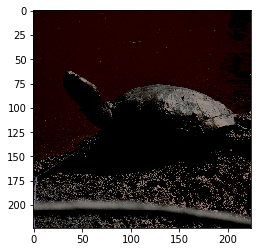

In [3]:
MEAN_RGB_VALUES = np.array([123.68, 116.779, 103.939], dtype=np.float32) 

image_for_resnet = (image - MEAN_RGB_VALUES)
image_for_resnet_bgr = image_for_resnet[:,:,::-1]

# PyPlot expects images to be in rgb format, so this image is going to look odd ...
# It also expects either integers [0..255] or float [0..1] to represent the RGB values. 
# We now have floats [0..255] so divide by 255 to ensure the image values are within range.
plt.imshow(image_for_resnet_bgr/255)

## Compare with Keras provided function

Keras provides a function to perform this pre-processing. Let's check that the code previously got it right.

Firstly, do the pre-processing with the Keras provided function.

In [4]:
from keras.applications.resnet50 import preprocess_input

keras_preprocessed_image_for_resnet = preprocess_input(image)



Using TensorFlow backend.


Now check the difference.

Note that the images may have a very small difference due to rounding errors.

In [5]:
diff = keras_preprocessed_image_for_resnet - image_for_resnet_bgr

if (np.amax(diff) < 0.0001):
    print("Yay! Pre-processed images are the same")
else:
    print("Oh dear. Pre-processed images are different")
    plt.imshow(keras_preprocessed_image_for_resnet/255)

Yay! Pre-processed images are the same
